# Time Value of Money 

In [80]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# DARK Monokai Theme for jupyter notebook
###################################################################################################
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('monokai')
# ####################################################################################################

> **The time value of money** is a fundamental financial concept that tells us about a dollar we possess today is worth more than a dollar promised in the future.It is due to the fact that we can use a single dollar on hand today to invest and earn interest/capital gains.

### Discounted Cash Flow (DCF)

> Now, we are going to extend the concept of present value in the investment context. Let’s presume we are planning for investment (e.g. stock, bond or mortgage, etc) which will give us a future cash flow of 100,000 after 20 years. The question here is what is actually the future cash of 100,000 after 20 years worth today? How much money should we start our investment to achieve our target?


> All we need is just to discounting the future cash flow to a present value from the 19th year, 18th year, 17th year until today. This will result in a sequence of discounted cash flows and the last value is the present value.

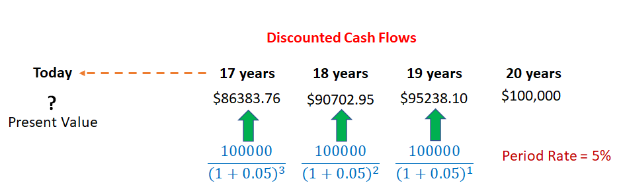

### Future / Present  Value 


- FV = Future Value
- r = annual Interest Rate (decimal
- n = Number of Periods (in years)
- PV = Present Value



$$FV = PV \cdot (1+r)^n$$



$$PV = \frac{FV}{(1+r)^n}$$






#### PV_ordinary_annuity
- PMT  = amount of  each annuity payment
- PV =  present value of annuity stream
$$PV = PMT\cdot\left(\frac{1 – \left(\frac{1}{\left(1+r\right)\cdot n}\right)}{r}\right)$$


### Application of DCF in the Valuation of Annuity



> **_Annuities_** are insurance contracts that provide a fixed income stream for a person’s lifetime or a specified period of time

> Let’s say you are considering a retirement annuity plan with an insurance company. You wish to retire and obtain a monthly payout of $2000 for the next 25 years. How much would it cost to purchase this annuity if the annual discount rates are 2.5%?

Generate a sequence of discounted cash flows (or the current present value) from the 1st month till the 300th month.
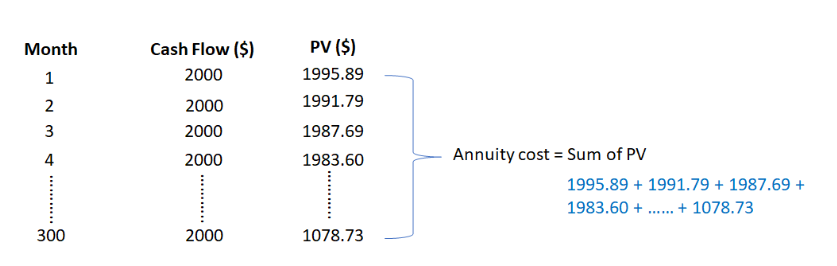

>  Basically, we need to receive x-amount every year, then PV of each of the year's will get calculated by PV (x, N years  , rate) and then added together for N years.

In [81]:
class Time_value_of_Money:
    """This class will consist of methods for calculating basic to complex formulas
    of Time value of money"""
    
    @staticmethod
    def get_FV(n,r,pv):
        """
        get  present Value from Future value, rate and period
        
        positive amount is because, FV has to be received usually
        """
        fv =pv*((1+r)**n)
        
        return(fv)
    
    @staticmethod
    def get_PV(n,r,fv):
        """
        get  present Value from Future value, rate and period
        
        negative amount is because, PV has to be paidusually
        """
        pv = -1*(fv)/((1+r)**n)
        
        return(pv)
    
    def get_PV_ordinary_Annuity_from_CashFlows(n, cash_flow,r ):
        """
        The present value of an ordinary annuity (i.e., an annuity that pays interest
        at the end of each specified period) 
        
        > Basically, we need to receive x-amount every year, then PV of each of the year's 
        will get calculated by PV (x, N years , rate) and then added together for N years.
        
        negative amount is because, PV has to be paid usually
        """
        pv = 0
        
        # NOTE : here if we get the payments(n) starting from t=0
        for t in range(0, n):
            
        # NOTE : here if we get the payments(n) starting from t=1
#       for t in range(1, n+1  ):
            pv_t = cash_flow/((1 + r)**t)
            pv += pv_t
        
        return(-1*pv)
        
    

In [82]:
Time_value_of_Money.get_PV(n=20,r=0.05,fv =100000)

-37688.94828730004

In [96]:
Time_value_of_Money.get_PV(2,0.069,1)

-0.8750736155679097

In [93]:
Time_value_of_Money.get_FV(2,0.069,1)

1.142761

> **QUESTION**: A major lottery advertises that it pays the winner 10 million. However this prize money is paid at the rate of 500,000 each year (with the first payment being immediate) for a total of 20 payments. What is the present value of this prize at 10% interest compounded annually? 

In [83]:
Time_value_of_Money.get_PV_ordinary_Annuity_from_CashFlows(n=20,cash_flow=0.5,r=0.10)

-4.682460045867208

#### forward_rate
**QUESTION** : Suppose the spot rates for 1 and 2 years are $S_1$ = 6.3% and  $S_2$= 6.9% with annual compounding. Recall that in this course interest rates are always quoted on an annual basis unless otherwise specified. What is the forward rate, $f_{1,2}$  assuming annual compounding?


forward rate b/w year 1 and 2 = $f_{1,2}$

discount factor between year 0 and 1  =$df_{(0,1)}$

$$f_{1,2}  = \frac{df_{(0,1)}}{df_{(0,2)} } -1 $$

In [97]:
(Time_value_of_Money.get_PV(1,0.063,1)  / Time_value_of_Money.get_PV(2,0.069,1) ) - 1

0.07503386641580434


##### Forward contract on a stock

**QUESTION** :The current price of a stock is $400 per share and it pays no dividend. Assuming a constant interest rate of 8% per year compounded quarterly, what is the stock's theoretical forward price for delivery in 9 months? 

In [98]:
Time_value_of_Money.get_FV(n=12/4, r=0.08/4,pv= 400)

424.48320000000007